In [2]:
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
def read_article(file_name):
    file = open(file_name, "r")
    filedata = file.readlines()
    article = filedata[0].split(". ")
    sentences = []

    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
    #sentences.pop() 
    
    return sentences

In [4]:
def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []
 
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
 
    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        if w in stopwords:
            continue
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        if w in stopwords:
            continue
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

In [5]:
def build_similarity_matrix(sentences, stop_words):
    # Create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
 
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1 == idx2: #ignore if both are same sentences
                continue 
            similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1], sentences[idx2], stop_words)

    return similarity_matrix

In [12]:
def generate_summary(file_name, top_n=2):
    stop_words = stopwords.words('english')
    summarize_text = []

    # Step 1 - Read text anc split it
    sentences =  read_article(file_name)

    # Step 2 - Generate Similary Martix across sentences
    sentence_similarity_martix = build_similarity_matrix(sentences, stop_words)
    print(sentence_similarity_martix)
    # Step 3 - Rank sentences in similarity martix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
    scores = nx.pagerank(sentence_similarity_graph)
    nx.draw(sentence_similarity_graph)
    
    print('scores:')
    print(scores)
    # Step 4 - Sort the rank and pick top sentences
    ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
    print("Indexes of top ranked_sentence order are ", ranked_sentence)    

    for i in range(top_n):
      summarize_text.append(" ".join(ranked_sentence[i][1]))

    # Step 5 - Offcourse, output the summarize texr
    print("Summarize Text: \n", ". ".join(summarize_text))

Hi I am Jayesh
Hi I am Jayesh Salvi
Hi I am Umang Yadav
Hi I am Umang.
[[0.         0.81649658 0.40824829 0.5       ]
 [0.81649658 0.         0.33333333 0.40824829]
 [0.40824829 0.33333333 0.         0.40824829]
 [0.5        0.40824829 0.40824829 0.        ]]
scores:
{0: 0.29392698824478586, 1: 0.26776110371281614, 2: 0.2064455098950518, 3: 0.2318663981473456}
Indexes of top ranked_sentence order are  [(0.29392698824478586, ['Hi', 'I', 'am', 'Jayesh']), (0.26776110371281614, ['Hi', 'I', 'am', 'Jayesh', 'Salvi']), (0.2318663981473456, ['Hi', 'I', 'am', 'Umang.']), (0.2064455098950518, ['Hi', 'I', 'am', 'Umang', 'Yadav'])]
Summarize Text: 
 Hi I am Jayesh. Hi I am Jayesh Salvi


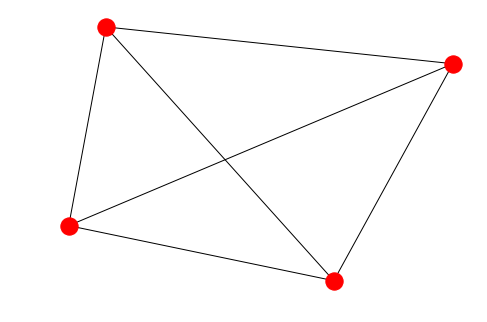

In [15]:
generate_summary('article.txt')